**TODO**
1. Написать когда по 4 сигналам прогнозируем 5ый. 

In [6]:
import sys
sys.path.insert(1, '../')

In [7]:
import torch
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from pandas.plotting import register_matplotlib_converters
from torch import nn, optim
from importlib import reload

import pickle
from zipfile import ZipFile



device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)


import random
def set_determenistic(seed=777,precision=10):
    np.random.seed(seed)
    random.seed(seed)
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True
    torch.manual_seed(seed)
    torch.set_printoptions(precision=precision)

set_determenistic()

cpu


# Download dataset and preprocessing

In [8]:
if os.path.exists('./data'):
    pass
else:
    os.mkdir('./data')
# ===============================================
if os.path.exists('./data/household_power_consumption.txt'):
    pass
else:
    os.system('curl  https://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.zip --output ./data/household_power_consumption.zip')
    with ZipFile('./data/household_power_consumption.zip', 'r') as zipObj:
        zipObj.extractall('./data')
    os.remove('./data/household_power_consumption.zip')
# =============================================== 


In [9]:
%%time
if os.path.exists('./data/df.pcl'):
    with open('./data/df.pcl', 'rb') as f:
        df = pickle.load(f)
else:
    data_path = './data/'
    df = pd.read_csv(data_path+'household_power_consumption.txt',sep=';')
    df['Datetime'] = df['Date']+ ' ' + df['Time']
    df.index = pd.to_datetime(df['Datetime'])
    df = df.drop(['Date','Time','Datetime'],1)

    for col in df:
        df[col]=pd.to_numeric(df[col], errors='coerce')
    df = df.dropna()
    df.head(3)
    dff  = df.copy()
    df= dff[:1495]
    with open('./data/df.pcl', 'wb') as f:
        pickle.dump(df, f)

Wall time: 2.43 ms


In [12]:
# import sys
# sys.path.insert(1, './DL_anomaly_detection')
from tsad import main, models #,stastics,generate_residuals,
# src = reload(src)
models = reload(models)
# generate_residuals = reload(generate_residuals)

# stastics = reload(stastics)
main = reload(main)

In [13]:
in_features = df.shape[1]

from tsad import  models
lstm = models.SimpleLSTM(in_features=in_features,n_hidden=in_features,n_layers=1) 
deepLstm = models.SimpleLSTM(in_features=in_features,n_hidden=in_features,n_layers=2) 
blstm = models.SimpleLSTM(in_features=in_features,n_hidden=in_features,n_layers=1,bidirectional=True)

lstmAe = models.SimpleLSTM(in_features=in_features,n_hidden=int(in_features*3/4),n_layers=1)




C:\Users\V.Kozitsin\Anaconda3\lib\site-packages\torch\nn\modules\rnn.py:47: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


In [14]:
dfs = df.copy()
a = main.DL_AD()

In [15]:
# model = SimpleLSTM(dfs.shape[1],dfs.shape[1],2,bidirectional=True).to(device)

Epoch: 01
	Train Loss: 0.216
	 Val. Loss: 0.300 
Epoch: 02
	Train Loss: 0.181
	 Val. Loss: 0.258 
Epoch: 03
	Train Loss: 0.152
	 Val. Loss: 0.221 
Epoch: 04
	Train Loss: 0.125
	 Val. Loss: 0.187 
Epoch: 05
	Train Loss: 0.102
	 Val. Loss: 0.157 
Epoch: 06
	Train Loss: 0.084
	 Val. Loss: 0.133 
Epoch: 07
	Train Loss: 0.071
	 Val. Loss: 0.114 
Epoch: 08
	Train Loss: 0.063
	 Val. Loss: 0.098 
Test Loss: 0.100


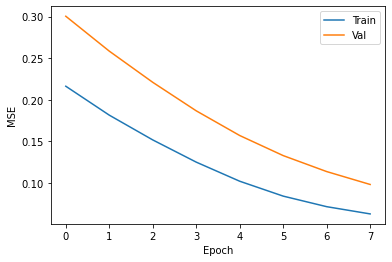

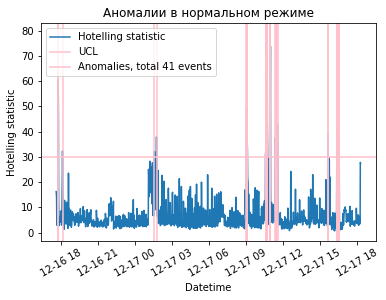

In [16]:
dd = a.fit(dfs,n_epochs=8,model=lstm,encod_decode_model=True,points_ahead=1)

In [13]:
t = torch.zeros(5,5,5)

In [15]:
t[:,::-1,:]

ValueError: step must be greater than zero

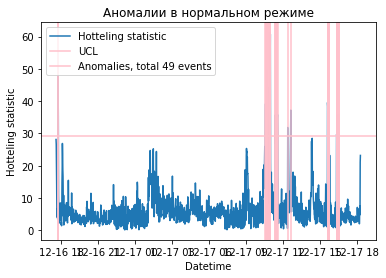

In [9]:
b= a.predict_anomaly(dfs)

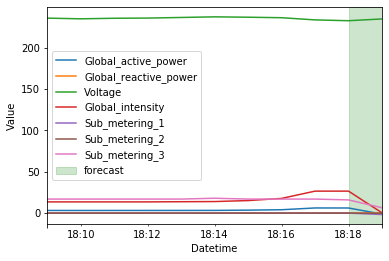

In [10]:
b= a.forecast(dfs)